# Importing Libraries

Tensorflow : is an open-source machine learning framework widely used for building and training various types of deep learning models.

Keras : is a high-level neural networks API that runs on top of TensorFlow and simplifies the process of building and training neural networks

Matplotlib : is used to generate various types of plots, histograms and more

OpenCV : is a powerful open-source library that focuses on computer vision and image processing tasks.

NumPy : is a fundamental library for numerical computing in Python. It provides multi-dimensional array objects, along with a collection of functions for performing mathematical operations on arrays efficiently.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


# Importing the DataSet



We are going to import the mnist dataset which is a large database of handwritten digits that is commonly used for training various image processing systems.

In [ ]:
mnist=keras.datasets.mnist
(X_train_FULL,Y_train_FULL),(X_test,Y_test)=mnist.load_data()

Here is an example of the mnist dataset which we imported


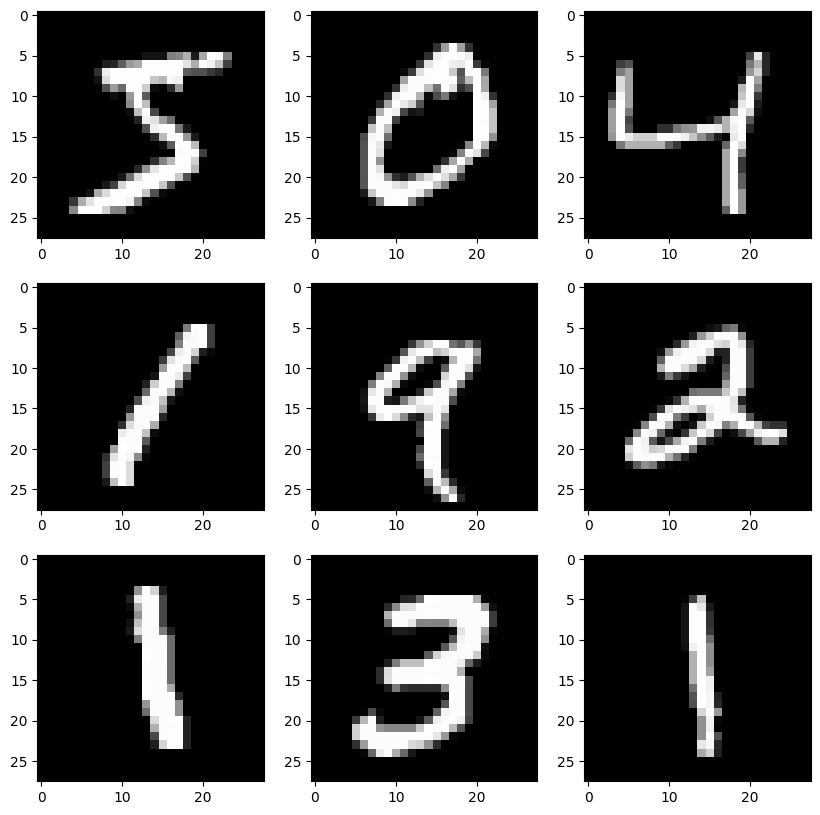

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
a=0
for i in range(3):
  for j in range(3):
    axes[i,j].imshow(X_train_FULL[a], cmap=plt.get_cmap('gray'))
    a=a+1
plt.show()

# Data Preparation

Here we will add a validation dataset ( to prevent overfitting ) and also normalize our pixel values.

We dont need to normalize the y values because they only go from 0 to 9.

In [ ]:
x_valid, X_train=X_train_FULL[:5000] / 255 , X_train_FULL[5000:] / 255
y_valid, y_train = Y_train_FULL[:5000], Y_train_FULL[5000:]
X_test=X_test/255


Giving names for our classes to be easier to identify ( not necessary )

For Example:

'3'

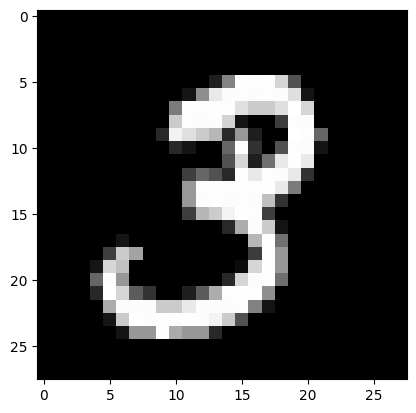

In [ ]:
class_names=["0","1","2","3","4","5","6","7","8","9"]
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
class_names[y_train[1]]

# Building Our Neural Network

Here we will create a model , Sequential simply means choosing the predefined layers and put layers on top of each other.

We will then add our first layer which is the input layer, we will flatten it ( make it a one big string of 784 pixels or in other words adding them one after the another ) and that is the number of inputs that we are going to have.

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

Then we will choose our activation functions and create our hidden layers.

The last one is our output layer, and we have 10 output neurons because there are 10 classes and we want our model to make a prediciton for each of these classes and we will use softmax in it, because it creates probabilites that are independent from each other and the summation of them leads to one.

In [ ]:
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

Summary of our model and how it looks.


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Here we will compile our model, basically this means we are giving it hyperparameters

Also choose our loss functions ( which will measure how good our model is doing ), the sparse_categorical_crossentropy is used when there are two or more label classes which is good in our model's case.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#  Model Training

Here we can choose the number of epochs ( how many times we want the model to be run on the whole dataset )  and the batch_size.

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(x_valid,y_valid),batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.2431 - accuracy: 0.9284 - val_loss: 0.1229 - val_accuracy: 0.9640
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1021 - accuracy: 0.9690 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0714 - accuracy: 0.9779 - val_loss: 0.0795 - val_accuracy: 0.9750
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.0839 - val_accuracy: 0.9726
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0830 - val_accuracy: 0.9784
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.0780 - val_accuracy:

 We will monitor the training process by observing the training loss and accuracy.

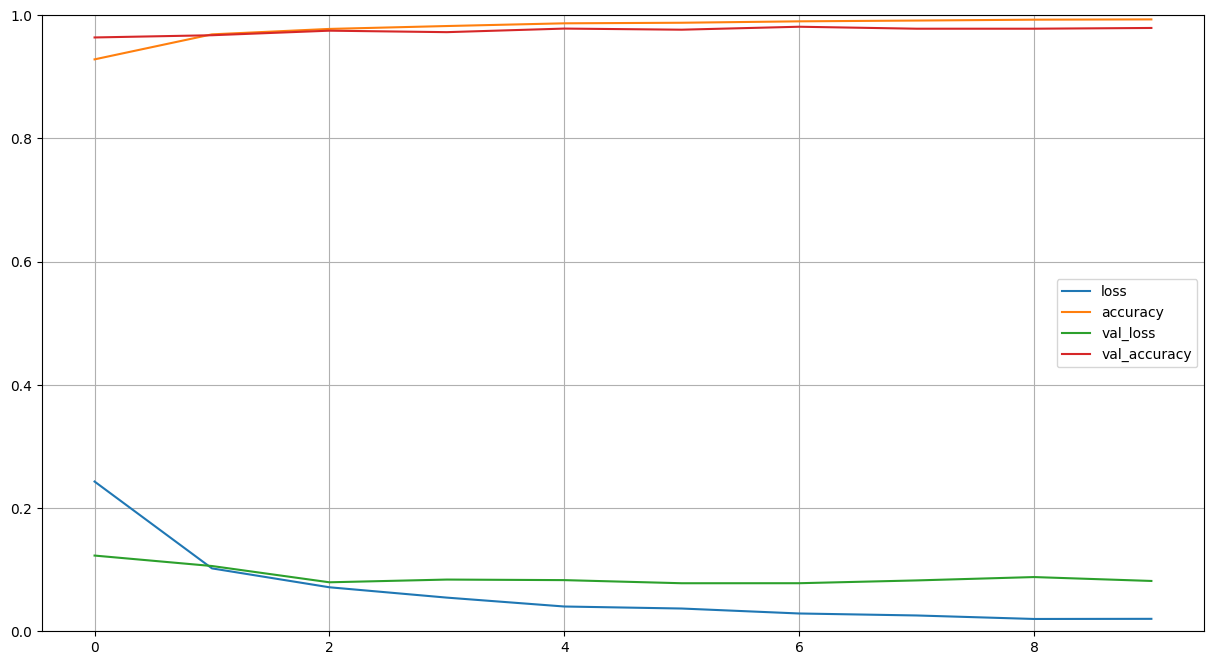

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Model Evaluation

We will calculate and report the accuracy of the model on the testing data

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9785


[0.09602761268615723, 0.9785000085830688]

# Inference and Trying out our model

We will test our model by inputting an image having a random number from 0 to 9.

I prepared the image before hand to be of size 28 * 28 so we dont need to resize it here.

We will then invert all the pixels values to match our dataset.

We will then convert it into grayscale to operate on it.


In [ ]:
img=cv.imread("sample_data/number_8.png")
img=cv.bitwise_not(img)
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray.shape

(28, 28)

We will then normalize the pixel values again to be sure, and reshape it to match our dataset

In [ ]:
newimg=tf.keras.utils.normalize(gray,axis=1)
newimg=np.array(newimg).reshape(-1,28,28,1)
newimg.shape

(1, 28, 28, 1)

In the Last Step we will test our model and see if it predicts well.

1/1 [==============================] - 0s 34ms/step
8


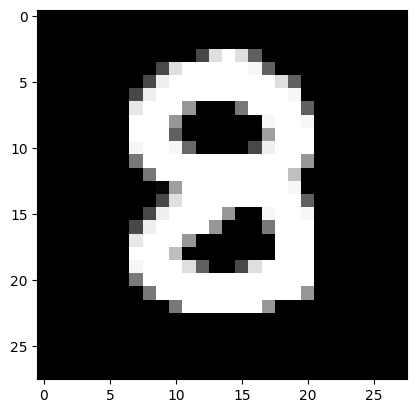

In [ ]:
prediction=model.predict(newimg)
print(np.argmax(prediction))
plt.imshow(img,cmap=plt.cm.binary)
plt.show()